# Markov: Un ejemplo sencillo

## Enunciado
Vamos a calcular la evolución de las distribuciones de probabilidad $u^{(n)}$ a partir de una distribución inicial conocida $u^{(0)}$ y una matriz de transiciones de probabilidad $P$ dadas, en un caso sencillo. Concretamente, consideramos el caso de una cadena de Markov $\left\{X_n\right\}$${n=0}$ con solo dos estados y distribución inicial $u^{(0)} = (1/2,1/2)$. La matriz de transiciones viene dada por

Como primer paso, calculamos los autovalores y autovectores de P. De este modo, podremos comprobar que P es diagonalizable y obtener las matrices D y Q tales que 

In [10]:
P = matrix(QQ ,[[0.175 , 0.825],[0.526 ,0.474]])
show("P=",P," Valores propios:", P.eigenvalues())
p=P.characteristic_polynomial(); show("p(x)= ",p) 

'P=' [   7/40   33/40]
[263/500 237/500] ' Valores propios:' [1, -351/1000]

'p(x)= ' x^2 - 649/1000*x - 351/1000

In [2]:
show("P=",P," Valores propios:", P.eigenvalues())
p=P.characteristic_polynomial(); show("p(x)= ",p) 

'P=' [   7/40   33/40]
[263/500 237/500] ' Valores propios:' [1, -351/1000]

'p(x)= ' x^2 - 649/1000*x - 351/1000

In [3]:
D = diagonal_matrix([P.eigenvalues()[0],
P.eigenvalues()[1]])
show("D=", D) 

'D=' [        1         0]
[        0 -351/1000]

In [4]:
P.eigenvectors_right() 

[(1,
  [
  (1, 1)
  ],
  1),
 (-351/1000,
  [
  (1, -526/825)
  ],
  1)]

In [5]:
q1=(P.eigenvectors_right()[0])[1][0];
q2=(P.eigenvectors_right()[1])[1][0];
show("q1=",q1," q2=",q2) 

'q1=' (1, 1) ' q2=' (1, -526/825)

In [6]:
q1 

(1, 1)

In [7]:
Q=column_matrix([q1,q2]);
show("Q=",Q)
print (P == Q*D*Q.inverse())

'Q=' [       1        1]
[       1 -526/825]

True


In [8]:
mo = vector((1/2,1/2));
var('n')
D^n
show(mo*Q*(D^n)*Q.inverse()) 

(299/2702*(-351)^n/1000^n + 526/1351, -299/2702*(-351)^n/1000^n + 825/1351)

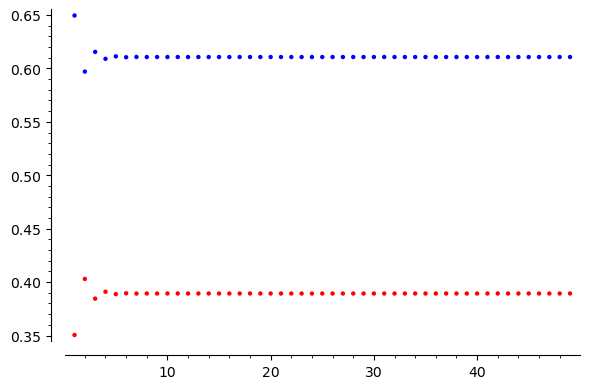

In [9]:
list_plot([(k,299*(-351)^k/(2702*1000^k)+526/1351) for k in
range(1,50)],color='red')+list_plot([(k,-299*
(-351)^k/(2702*1000^k)+825/1351) for k in range(1,50)]) 